<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/5_3_ESAA_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. 회귀

[대표적인 선형회귀 모델]

1. 일반 선형회귀

2. 릿지 : 선형회귀에 L2규제 추가한 회귀모델. L2 규제란 상대적으로 큰 회귀계수 값의 예측 영향도를 감소시키기 위해 회귀 계수 값을 더 작게 만드는 규제 모델

3. 라쏘 : 선형회귀에 L1 규제를 추가한 회귀모델. L1규제는 예측 영향력이 작은 피처의 회귀계수를 0으로 만들어 회귀 예측시 피처가 선택되지 않게 하는 것

4. 엘라스틱넷 : L2, L1 규제를 합한 것. 주로 피처가 많은 데이터 세트에서 활용

5. 로지스틱 회귀 : 사실상 분류에 사용되는 회귀

## 2. 단순선형회귀를 통한 회귀 이해

RSS = 오차 제곱 합. 이 RSS를 최소로 하는 회귀계수를 찾는 것이 핵심;

## 3. 비용 최소화하기 - 경사하강법 (Gradient Descent) 소개

: 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W 파라미터 구하는 방식

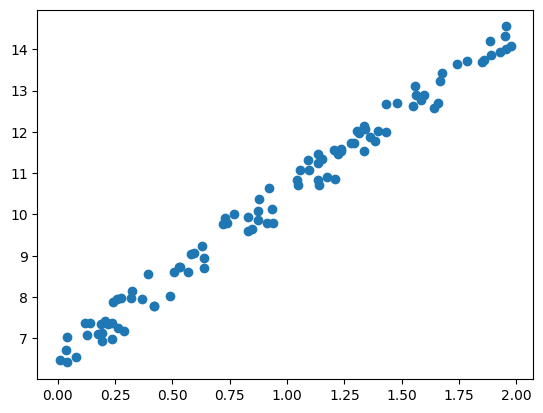

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2*np.random.rand(100,1)
y = 6+4*X + np.random.rand(100,1)

# X,y 데이터 세트 산점도르 시각화
plt.scatter(X,y)

In [4]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

In [15]:
#w1 과 w0을 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #예측배열 계산하고 예측과 실제 값의 차이 계산
  y_pred = np.dot(X,w1.T)+w0
  diff = y-y_pred

  #w0_update 를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0을 업데이트 할 w1_update와 w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [12]:
def gradient_descent_steps(X,y,iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0, X,y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update
  return w1,w0

In [16]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0]*X+w0
print("Gradient Descent Total Cost:{0:.4f}".format(get_cost(y,y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Cost:0.0775


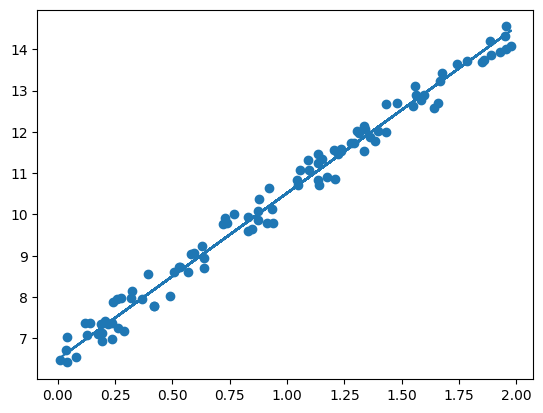

In [17]:
plt.scatter(X,y)
plt.plot(X,y_pred)

확률적 경사하강법 !


In [23]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X, sample_y, learning_rate=0.01)
    w1 = w1- w1_update
    w0 = w0- w0_update

  return w1,w0

In [25]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1 : ", round(w1[0,0],3), "w0:", round(w0[0,0],3))
y_pred = w1[0,0]*X+w0
print('stochastic Gradient Descent Total Cost :{0:.4f}'.format(get_cost(y,y_pred)))

w1 :  4.031 w0: 6.486
stochastic Gradient Descent Total Cost :0.0777


## 4. 사이킷런 linearRegression을 활용한 보스턴 주택가격 예측

### LinearRegrsssion 클래스 - Ordinart Least Squares

In [26]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)


SyntaxError: invalid syntax (<ipython-input-26-1cefb1a956ca>, line 1)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.

feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX' ,'PTRATIO', 'B' ,'LSTAT', 'PRICE']

bostonDF = pd.DataFrame(boston, columns=feature_names)


print('Boston 데이터 세트 크기:', bostonDF.shape)

bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


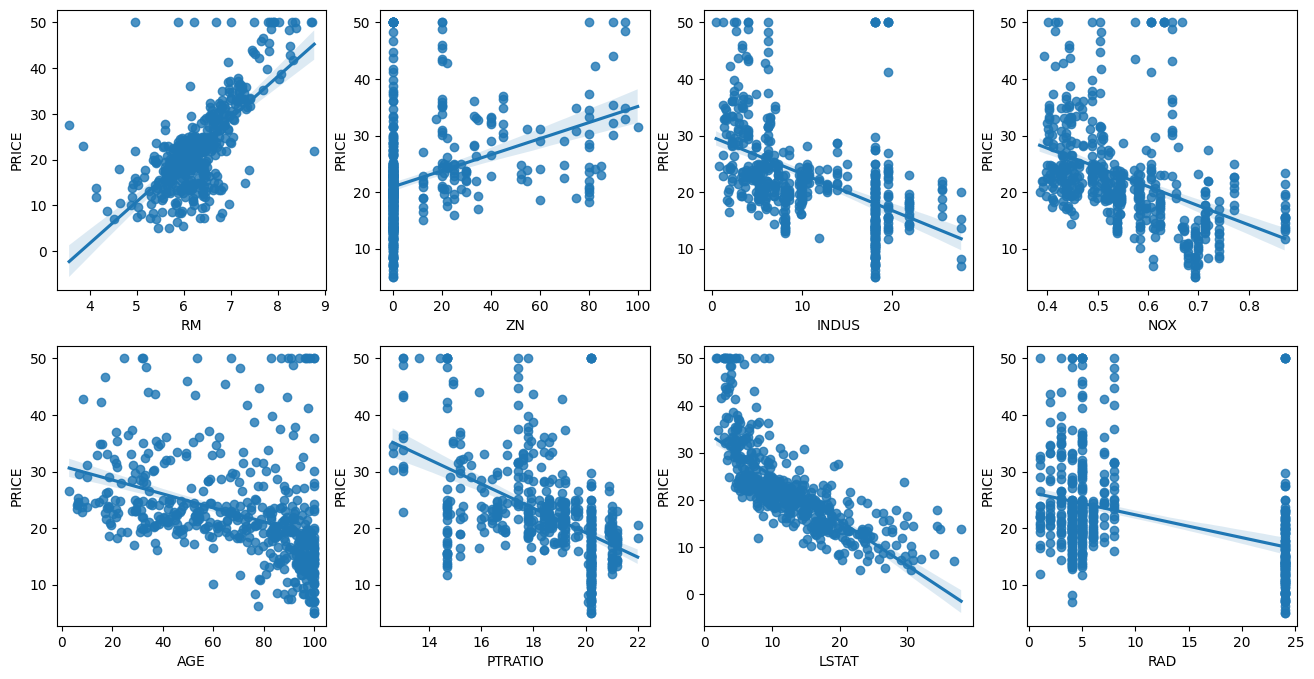

In [31]:
#2개의 행과 4개의 열을 가진 subplos 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  #사본의 regplot을 이용해 산점도와 선형회귀직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train, X_test, y_train, y_test= train_test_split(X_data, y_target, test_size=0.3, random_state=156)

#선형회귀 OLS로 학습/예측/평가 수행
lr= LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3F}'.format(mse,rmse))
print('Variance Score: {0:.3F}'.format(r2_score(y_test,y_preds)))

MSE:17.297, RMSE:4.159
Variance Score: 0.757


In [34]:
print('절편값 :', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편값 : 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [35]:
#회귀계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [37]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr= LinearRegression()

#cross_val_score()로 5폴드 세트로 MSE 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores= cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scorin="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5fold의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5folds의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5fold의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5folds의 평균 RMSE:5.829


## 5. 다항회귀와 과대/과소적합 이해

In [38]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [39]:
def polynomial_func(X):
  y =  1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정값 :\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값 :
 [  5 125]


In [40]:
#3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model= LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def polynomial_func(X):
  y =  1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

#pipeline 객체로 streamline 하게 polynomial feature 변환과 linear regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀를 이용한 과소적합 및 과적합 이해

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X):
  return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples=30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_sampled)*0.1


Degree 1 회귀계수는 [-1.61]입니다.
Degree 1 MSE 는 0.4077289625098685입니다. 


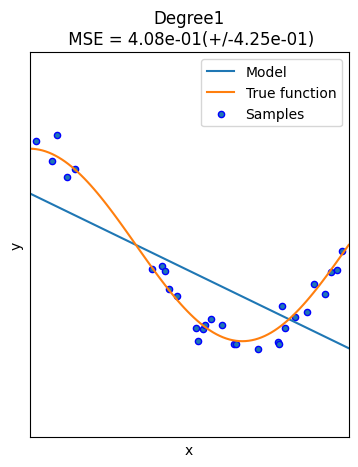


Degree 4 회귀계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE 는 0.04320874987232064입니다. 


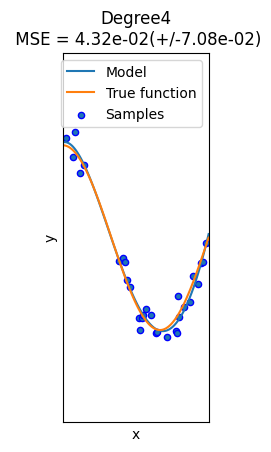


Degree 15 회귀계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE 는 181238256.56423894입니다. 


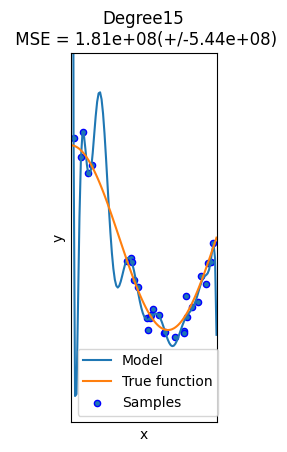

In [55]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                       ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  scores = cross_val_score(pipeline, X.reshape(-1,1),y,scoring="neg_mean_squared_error", cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀계수는 {1}입니다.'.format(degrees[i], np.round(coefficients,2)))
  print('Degree {0} MSE 는 {1}입니다. '.format(degrees[i], -1*np.mean(scores)))

  X_test = np.linspace(0,1,100)
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
  plt.plot(X_test, true_fun(X_test), '-', label="True function")
  plt.scatter(X,y,edgecolor='b', s=20, label="Samples")


  plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc='best')
  plt.title("Degree{}\n MSE = {:.2e}(+/-{:.2e})".format(degrees[i],-scores.mean(), scores.std()))

  plt.show()